In [1]:
from IPython.display import display, HTML

css_str = '''
    <style>
        div.text_cell_render {
            font-family: serif, serif;
            font-size: 120%;
            line-height: 180% !important;
        }

        hr {
            height: 1px;
        }
    </style>
'''

HTML(css_str)

<hr>

**Autor**: JESÚS ALBERTO GALLINAL MORENO

**Fecha**: 13/01/2024

**Asignatura**: *Programación Científica y HPC - PER 8406*

**Actividad (grupal)**: **2. Polinomios de Chebyshev** - *Tarea 2. Interpolación con splines*

<hr>

<a id="Tarea_2"></a>

# Tarea 2. Interpolación con splines.

Es un método de interpolación que emplea polinomios para cada intervalo de interpolación. El *spline* $S(x)$ es una función definida a trozos (uno por cada intervalo de interpolación) donde cada trozo es un polinomio $S_i(x)$ de grado $n$. Si $n=3$ se denomina *spline cúbico* y es el más empleado y el que se pide usar en esta actividad.

El *spline cúbico* $S(x)$ permite interpolar en el intervalo $[a,b]$ una función $f(x)$ conocida puntualmente en los *nodos*: $a=x_0<x_1<\cdots<x_{n-1}<x_n=b$, cumpliendo las siguientes condiciones:

1. $S(x)=S_i(x)=a_i+b_i(x-x_i)+c_i(x-x_i)^2+d_i(x-x_i)^3\,,\quad x\in[x_i,x_{i+1})\,,\quad\forall\,i=0,1,\ldots,n-1$<br><br>
2. $S(x_i)=f(x_i)\,,\quad\forall\,i=0,1,\ldots,n$<br><br>
3. $S_i(x_{i+1})=S_{i+1}(x_{i+1})\,,\quad S'_i(x_{i+1})=S'_{i+1}(x_{i+1})\,,\quad S''_i(x_{i+1})=S''_{i+1}(x_{i+1})\,,\quad\forall\,i=0,1,\ldots,n-2$<br><br>
4. Si la condición de contorno es $S''(x_0)=S''(x_n)=0$ entonces se llama *spline cúbico natural* (que es el que se usará).<br><br>
5. El cálculo de los coeficientes $a_i, b_i, c_i, d_i$ implica resolver un sistema de ecuaciones lineal.

Para obtener el *spline cúbico* $S(x)$ se usará la clase `scipy.interpolate.CubicSpline` de la biblioteca de computación científica `SciPy` (ver [documentación](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html))


<hr>

<a id="Apartado_1"></a>

### <ins>Apartado 1.</ins> *Obtengan los puntos de la función en los nodos de interpolación seleccionados.*

Se pide utilizar $11$ y $21$ *nodos equidistantes* o *nodos* obtenidos a partir de los polinomios de *Chebyshev*. Dichos *nodos* se han calculado previamente y guardado en los archivos de *nodos equidistantes*: `nodos_equis_11.txt` y `nodos_equis_21.txt`, y en los archivos de *nodos Chebyshev*: `nodos_11.txt` y `nodos_21.txt`. Se procede a cargar las bibliotecas de Python requeridas y los *nodos*.

In [2]:
import numpy as np
from scipy.interpolate import CubicSpline
import pandas as pd
import timeit
import matplotlib.pyplot as plt

n11eq = np.loadtxt('nodos_equis_11.txt', delimiter='\t')
n21eq = np.loadtxt('nodos_equis_21.txt', delimiter='\t')
n11ch = np.loadtxt('nodos_11.txt', delimiter='\t')
n21ch = np.loadtxt('nodos_21.txt', delimiter='\t')

Se calculan los valores en los *nodos* para cada función pedida:

$$f(x) = \mathrm{sen}(x)\,,\qquad g(x) = \frac{1}{1 + 25x^2}\,,\qquad h(x) = \mathrm{e}^{-20x^2}$$

In [3]:
f11eq = np.sin(n11eq)
f21eq = np.sin(n21eq)
f11ch = np.sin(n11ch)
f21ch = np.sin(n21ch)

g11eq = 1/(1+(25*n11eq**2))
g21eq = 1/(1+(25*n21eq**2))
g11ch = 1/(1+(25*n11ch**2))
g21ch = 1/(1+(25*n21ch**2))

h11eq = np.exp(-20*n11eq**2)
h21eq = np.exp(-20*n21eq**2)
h11ch = np.exp(-20*n11ch**2)
h21ch = np.exp(-20*n21ch**2)

<hr>

<a id="Apartado_2"></a>

### <ins>Apartado 2.</ins> *Usen esos puntos para obtener el polinomio de interpolación con splines cúbicos.*

Se calculan los *splines cúbicos naturales* en cada caso:

In [4]:
def calculaSplineCubicoNatural(nodos, valores):
    return CubicSpline(nodos, valores, bc_type='natural')

SCNf11eq = calculaSplineCubicoNatural(n11eq, f11eq)
SCNf21eq = calculaSplineCubicoNatural(n21eq, f21eq)
SCNf11ch = calculaSplineCubicoNatural(n11ch, f11ch)
SCNf21ch = calculaSplineCubicoNatural(n21ch, f21ch)

SCNg11eq = calculaSplineCubicoNatural(n11eq, g11eq)
SCNg21eq = calculaSplineCubicoNatural(n21eq, g21eq)
SCNg11ch = calculaSplineCubicoNatural(n11ch, g11ch)
SCNg21ch = calculaSplineCubicoNatural(n21ch, g21ch)

SCNh11eq = calculaSplineCubicoNatural(n11eq, h11eq)
SCNh21eq = calculaSplineCubicoNatural(n21eq, h21eq)
SCNh11ch = calculaSplineCubicoNatural(n11ch, h11ch)
SCNh21ch = calculaSplineCubicoNatural(n21ch, h21ch)

<hr>

<a id="Apartado_3"></a>

### <ins>Apartado 3.</ins> *Calculen el error de interpolación en cada caso.*

Se estima el *error absoluto medio* $\overline{\epsilon}$ entre los *splines cúbicos naturales* $S_f(x)$, $S_g(x)$ y $S_h(x)$ y las funciones $f(x)$, $g(x)$ y $h(x)$ repectivamente para cada caso del número y tipo de *nodos*. Para ello se toman $100$ valores de $x$ *equidistantes* con los que comparar las muestras exactas de $f(x)$, $g(x)$ y $h(x)$ con sus *splines* correspondientes en cada caso y se tabulan los resultados.

$$\overline{\epsilon}_f = \frac{\sum\left|S_f(x)-f(x)\right|}{100}\,,\qquad
\overline{\epsilon}_g = \frac{\sum\left|S_g(x)-g(x)\right|}{100}\,,\qquad
\overline{\epsilon}_h = \frac{\sum\left|S_h(x)-h(x)\right|}{100}$$

In [5]:
xRef = np.linspace(-np.pi, np.pi, 100) # valores de x de referencia para tomar muestras exactas de f(x), g(x) y h(x) y de sus splines...

fVal = np.sin(xRef) # valores exactos de f(x)...
gVal = 1/(1+(25*xRef**2)) # valores exactos de g(x)...
hVal = np.exp(-20*xRef**2) # valores exactos de h(x)...

SCNf11eqVal = SCNf11eq(xRef) # valores del spline de f(x) con 11 nodos equidistantes...
SCNf21eqVal = SCNf21eq(xRef) # valores del spline de f(x) con 21 nodos equidistantes...
SCNf11chVal = SCNf11ch(xRef) # valores del spline de f(x) con 11 nodos Chebyshev...
SCNf21chVal = SCNf21ch(xRef) # valores del spline de f(x) con 21 nodos Chebyshev...

SCNg11eqVal = SCNg11eq(xRef) # valores del spline de g(x) con 11 nodos equidistantes...
SCNg21eqVal = SCNg21eq(xRef) # valores del spline de g(x) con 21 nodos equidistantes...
SCNg11chVal = SCNg11ch(xRef) # valores del spline de g(x) con 11 nodos Chebyshev...
SCNg21chVal = SCNg21ch(xRef) # valores del spline de g(x) con 21 nodos Chebyshev...

SCNh11eqVal = SCNh11eq(xRef) # valores del spline de h(x) con 11 nodos equidistantes...
SCNh21eqVal = SCNh21eq(xRef) # valores del spline de h(x) con 21 nodos equidistantes...
SCNh11chVal = SCNh11ch(xRef) # valores del spline de h(x) con 11 nodos Chebyshev...
SCNh21chVal = SCNh21ch(xRef) # valores del spline de h(x) con 21 nodos Chebyshev...

EAMf11eq = np.mean(np.abs(SCNf11eqVal-fVal)) # error absoluto medio del spline con f(x) para 11 nodos equidistantes...
EAMf21eq = np.mean(np.abs(SCNf21eqVal-fVal)) # error absoluto medio del spline con f(x) para 21 nodos equidistantes...
EAMf11ch = np.mean(np.abs(SCNf11chVal-fVal)) # error absoluto medio del spline con f(x) para 11 nodos Chebyshev...
EAMf21ch = np.mean(np.abs(SCNf21chVal-fVal)) # error absoluto medio del spline con f(x) para 21 nodos Chebyshev...

EAMg11eq = np.mean(np.abs(SCNg11eqVal-gVal)) # error absoluto medio del spline con g(x) para 11 nodos equidistantes...
EAMg21eq = np.mean(np.abs(SCNg21eqVal-gVal)) # error absoluto medio del spline con g(x) para 21 nodos equidistantes...
EAMg11ch = np.mean(np.abs(SCNg11chVal-gVal)) # error absoluto medio del spline con g(x) para 11 nodos Chebyshev...
EAMg21ch = np.mean(np.abs(SCNg21chVal-gVal)) # error absoluto medio del spline con g(x) para 21 nodos Chebyshev...

EAMh11eq = np.mean(np.abs(SCNh11eqVal-hVal)) # error absoluto medio del spline con h(x) para 11 nodos equidistantes...
EAMh21eq = np.mean(np.abs(SCNh21eqVal-hVal)) # error absoluto medio del spline con h(x) para 21 nodos equidistantes...
EAMh11ch = np.mean(np.abs(SCNh11chVal-hVal)) # error absoluto medio del spline con h(x) para 11 nodos Chebyshev...
EAMh21ch = np.mean(np.abs(SCNh21chVal-hVal)) # error absoluto medio del spline con h(x) para 21 nodos Chebyshev...

tablaErrores = pd.DataFrame({'11 nodos equidistantes': [EAMf11eq, EAMg11eq, EAMh11eq], '21 nodos equidistantes': [EAMf21eq, EAMg21eq, EAMh21eq], '11 nodos Chebyshev': [EAMf11ch, EAMg11ch, EAMh11ch], '21 nodos Chebyshev': [EAMf21ch, EAMg21ch, EAMh21ch]}, index=['$\overline{\epsilon}_f$', '$\overline{\epsilon}_g$', '$\overline{\epsilon}_h$'])
display(HTML('<a id="Apartado_3_Out"></a>'))
tablaErrores

,11 nodos equidistantes,21 nodos equidistantes,11 nodos Chebyshev,21 nodos Chebyshev
$\overline{\epsilon}_f$,0.000158,0.000009,0.000429,0.000025
$\overline{\epsilon}_g$,0.059047,0.010446,0.098134,0.030192
$\overline{\epsilon}_h$,0.072905,0.007941,0.117034,0.036316


<hr>

<a id="Apartado_4"></a>

### <ins>Apartado 4.</ins> *Calculen los tiempos de cálculo de los polinomios.*

Se estima el *tiempo promedio de cálculo* de los *splines cúbicos naturales* mediante la función `timeit.timeit()` (ver [documentación](https://docs.python.org/3/library/timeit.html)) y se tabulan los resultados en *milisegundos*.

In [6]:
def milisegundosCalculo(stmt):
    return 1000*timeit.timeit(stmt=stmt, globals=globals(), number=10)

tSCNf11eq = milisegundosCalculo('calculaSplineCubicoNatural(n11eq, f11eq)')
tSCNg11eq = milisegundosCalculo('calculaSplineCubicoNatural(n11eq, g11eq)')
tSCNh11eq = milisegundosCalculo('calculaSplineCubicoNatural(n11eq, h11eq)')

tSCNf21eq = milisegundosCalculo('calculaSplineCubicoNatural(n21eq, f21eq)')
tSCNg21eq = milisegundosCalculo('calculaSplineCubicoNatural(n21eq, g21eq)')
tSCNh21eq = milisegundosCalculo('calculaSplineCubicoNatural(n21eq, h21eq)')

tSCNf11ch = milisegundosCalculo('calculaSplineCubicoNatural(n11ch, f11ch)')
tSCNg11ch = milisegundosCalculo('calculaSplineCubicoNatural(n11ch, g11ch)')
tSCNh11ch = milisegundosCalculo('calculaSplineCubicoNatural(n11ch, h11ch)')

tSCNf21ch = milisegundosCalculo('calculaSplineCubicoNatural(n21ch, f21ch)')
tSCNg21ch = milisegundosCalculo('calculaSplineCubicoNatural(n21ch, g21ch)')
tSCNh21ch = milisegundosCalculo('calculaSplineCubicoNatural(n21ch, h21ch)')

tablaTiempos = pd.DataFrame({'11 nodos equidistantes (ms)': [tSCNf11eq, tSCNg11eq, tSCNh11eq], '21 nodos equidistantes (ms)': [tSCNf21eq, tSCNg21eq, tSCNh21eq], '11 nodos Chebyshev (ms)': [tSCNf11ch, tSCNg11ch, tSCNh11ch], '21 nodos Chebyshev (ms)': [tSCNf21ch, tSCNg21ch, tSCNh21ch]}, index=['calcular $S_f(x)$', 'calcular $S_g(x)$', 'calcular $S_h(x)$'])
display(HTML('<a id="Apartado_4_Out"></a>'))
tablaTiempos

,11 nodos equidistantes (ms),21 nodos equidistantes (ms),11 nodos Chebyshev (ms),21 nodos Chebyshev (ms)
calcular $S_f(x)$,2.3948,2.0003,1.8201,2.0136
calcular $S_g(x)$,1.9328,1.8385,1.8237,2.0213
calcular $S_h(x)$,1.8535,1.8746,2.0191,2.0461


<hr>

<a id="Apartado_5"></a>

### <ins>Apartado 5.</ins> *Dibujen las gráficas de la función real y del polinomio obtenido.*

Se carga la configuración para *plotear* las gráficas...

In [7]:
%config InlineBackend.figure_format = 'svg' # para mejorar la calidad visual de las gráficas...
plt.rcdefaults()
#plt.rcParams.keys()
dpi = plt.rcParams['figure.dpi']
plt.rc('figure', figsize=(2*450/dpi, 2*350/dpi))
plt.rc('font', size=12)
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage[cm]{sfmath}')
plt.rc('axes', titley=1.05)

<hr>

<a id="Ploteo_f"></a>

Se *plotean* las gráficas $f(x) = \mathrm{sen}(x)$ y sus *splines*:

* $S_f^{(11eq)}(x)\rightarrow$ es el *spline* calculado a partir de los $11$ *nodos equidistantes*<br><br>
* $S_f^{(21eq)}(x)\rightarrow$ es el *spline* calculado a partir de los $21$ *nodos equidistantes*<br><br>
* $S_f^{(11ch)}(x)\rightarrow$ es el *spline* calculado a partir de los $11$ *nodos Chebyshev*<br><br>
* $S_f^{(21ch)}(x)\rightarrow$ es el *spline* calculado a partir de los $21$ *nodos Chebyshev*

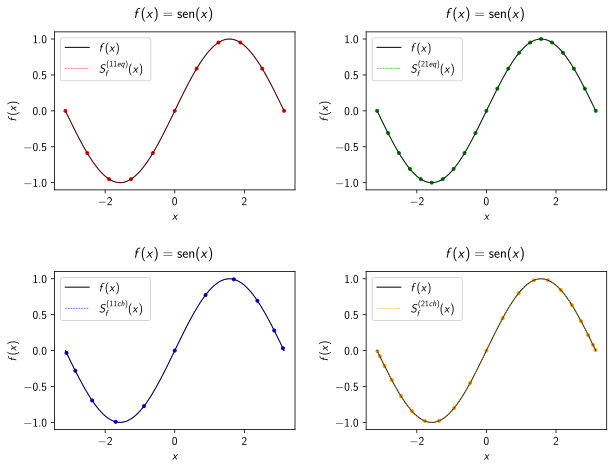

In [8]:
plt.subplot(2, 2, 1)
plt.title(r'$f(x) = \mathrm{sen}(x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.plot(xRef, fVal, label=r'$f(x)$', color='black', linewidth=1)
plt.plot(xRef, SCNf11eqVal, label=r'$S_f^{(11eq)}(x)$', color='red', linewidth=0.5, linestyle='--')
plt.scatter(n11eq, f11eq, color='red', marker='.')
plt.legend()

plt.subplot(2, 2, 2)
plt.title(r'$f(x) = \mathrm{sen}(x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.plot(xRef, fVal, label=r'$f(x)$', color='black', linewidth=1)
plt.plot(xRef, SCNf21eqVal, label=r'$S_f^{(21eq)}(x)$', color='green', linewidth=0.5, linestyle='--')
plt.scatter(n21eq, f21eq, color='green', marker='.')
plt.legend()

plt.subplot(2, 2, 3)
plt.title(r'$f(x) = \mathrm{sen}(x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.plot(xRef, fVal, label=r'$f(x)$', color='black', linewidth=1)
plt.plot(xRef, SCNf11chVal, label=r'$S_f^{(11ch)}(x)$', color='blue', linewidth=0.5, linestyle='--')
plt.scatter(n11ch, f11ch, color='blue', marker='.')
plt.legend()

plt.subplot(2, 2, 4)
plt.title(r'$f(x) = \mathrm{sen}(x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.plot(xRef, fVal, label=r'$f(x)$', color='black', linewidth=1)
plt.plot(xRef, SCNf21chVal, label=r'$S_f^{(21ch)}(x)$', color='orange', linewidth=0.5, linestyle='--')
plt.scatter(n21ch, f21ch, color='orange', marker='.')
plt.legend()

plt.tight_layout(pad=2.0)
display(HTML('<a id="Apartado_5_Out_f"></a>'))
plt.show()

<hr>

<a id="Ploteo_g"></a>

Se *plotean* las gráficas $g(x) = {\displaystyle\frac{1}{1 + 25x^2}}$ y sus *splines*:

* $S_g^{(11eq)}(x)\rightarrow$ es el *spline* calculado a partir de los $11$ *nodos equidistantes*<br><br>
* $S_g^{(21eq)}(x)\rightarrow$ es el *spline* calculado a partir de los $21$ *nodos equidistantes*<br><br>
* $S_g^{(11ch)}(x)\rightarrow$ es el *spline* calculado a partir de los $11$ *nodos Chebyshev*<br><br>
* $S_g^{(21ch)}(x)\rightarrow$ es el *spline* calculado a partir de los $21$ *nodos Chebyshev*

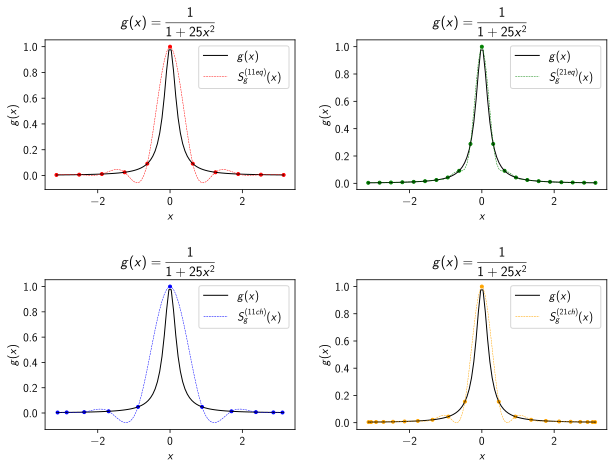

In [9]:
plt.subplot(2, 2, 1)
plt.title(r'$g(x) = {\displaystyle\frac{1}{1 + 25x^2}}$')
plt.xlabel(r'$x$')
plt.ylabel(r'$g(x)$')
plt.plot(xRef, gVal, label=r'$g(x)$', color='black', linewidth=1)
plt.plot(xRef, SCNg11eqVal, label=r'$S_g^{(11eq)}(x)$', color='red', linewidth=0.5, linestyle='--')
plt.scatter(n11eq, g11eq, color='red', marker='.')
plt.legend()

plt.subplot(2, 2, 2)
plt.title(r'$g(x) = {\displaystyle\frac{1}{1 + 25x^2}}$')
plt.xlabel(r'$x$')
plt.ylabel(r'$g(x)$')
plt.plot(xRef, gVal, label=r'$g(x)$', color='black', linewidth=1)
plt.plot(xRef, SCNg21eqVal, label=r'$S_g^{(21eq)}(x)$', color='green', linewidth=0.5, linestyle='--')
plt.scatter(n21eq, g21eq, color='green', marker='.')
plt.legend()

plt.subplot(2, 2, 3)
plt.title(r'$g(x) = {\displaystyle\frac{1}{1 + 25x^2}}$')
plt.xlabel(r'$x$')
plt.ylabel(r'$g(x)$')
plt.plot(xRef, gVal, label=r'$g(x)$', color='black', linewidth=1)
plt.plot(xRef, SCNg11chVal, label=r'$S_g^{(11ch)}(x)$', color='blue', linewidth=0.5, linestyle='--')
plt.scatter(n11ch, g11ch, color='blue', marker='.')
plt.legend()

plt.subplot(2, 2, 4)
plt.title(r'$g(x) = {\displaystyle\frac{1}{1 + 25x^2}}$')
plt.xlabel(r'$x$')
plt.ylabel(r'$g(x)$')
plt.plot(xRef, gVal, label=r'$g(x)$', color='black', linewidth=1)
plt.plot(xRef, SCNg21chVal, label=r'$S_g^{(21ch)}(x)$', color='orange', linewidth=0.5, linestyle='--')
plt.scatter(n21ch, g21ch, color='orange', marker='.')
plt.legend()

plt.tight_layout(pad=2.0)
display(HTML('<a id="Apartado_5_Out_g"></a>'))
plt.show()

<hr>

<a id="Ploteo_h"></a>

Se *plotean* las gráficas $h(x) = \mathrm{e}^{-20x^2}$ y sus *splines*:

* $S_h^{(11eq)}(x)\rightarrow$ es el *spline* calculado a partir de los $11$ *nodos equidistantes*<br><br>
* $S_h^{(21eq)}(x)\rightarrow$ es el *spline* calculado a partir de los $21$ *nodos equidistantes*<br><br>
* $S_h^{(11ch)}(x)\rightarrow$ es el *spline* calculado a partir de los $11$ *nodos Chebyshev*<br><br>
* $S_h^{(21ch)}(x)\rightarrow$ es el *spline* calculado a partir de los $21$ *nodos Chebyshev*

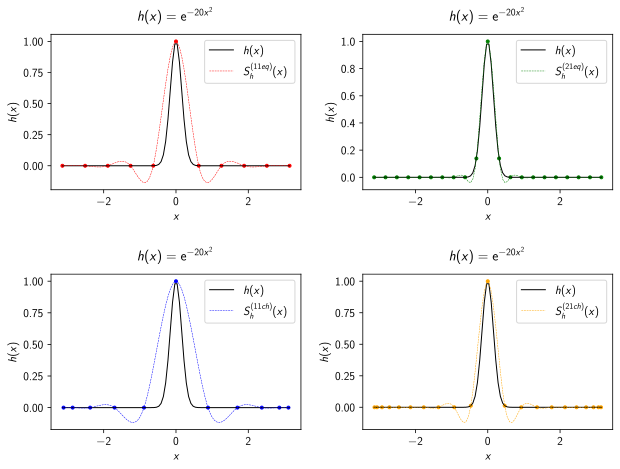

In [10]:
plt.subplot(2, 2, 1)
plt.title(r'$h(x) = \mathrm{e}^{-20x^2}$')
plt.xlabel(r'$x$')
plt.ylabel(r'$h(x)$')
plt.plot(xRef, hVal, label=r'$h(x)$', color='black', linewidth=1)
plt.plot(xRef, SCNh11eqVal, label=r'$S_h^{(11eq)}(x)$', color='red', linewidth=0.5, linestyle='--')
plt.scatter(n11eq, h11eq, color='red', marker='.')
plt.legend()

plt.subplot(2, 2, 2)
plt.title(r'$h(x) = \mathrm{e}^{-20x^2}$')
plt.xlabel(r'$x$')
plt.ylabel(r'$h(x)$')
plt.plot(xRef, hVal, label=r'$h(x)$', color='black', linewidth=1)
plt.plot(xRef, SCNh21eqVal, label=r'$S_h^{(21eq)}(x)$', color='green', linewidth=0.5, linestyle='--')
plt.scatter(n21eq, h21eq, color='green', marker='.')
plt.legend()

plt.subplot(2, 2, 3)
plt.title(r'$h(x) = \mathrm{e}^{-20x^2}$')
plt.xlabel(r'$x$')
plt.ylabel(r'$h(x)$')
plt.plot(xRef, hVal, label=r'$h(x)$', color='black', linewidth=1)
plt.plot(xRef, SCNh11chVal, label=r'$S_h^{(11ch)}(x)$', color='blue', linewidth=0.5, linestyle='--')
plt.scatter(n11ch, h11ch, color='blue', marker='.')
plt.legend()

plt.subplot(2, 2, 4)
plt.title(r'$h(x) = \mathrm{e}^{-20x^2}$')
plt.xlabel(r'$x$')
plt.ylabel(r'$h(x)$')
plt.plot(xRef, hVal, label=r'$h(x)$', color='black', linewidth=1)
plt.plot(xRef, SCNh21chVal, label=r'$S_h^{(21ch)}(x)$', color='orange', linewidth=0.5, linestyle='--')
plt.scatter(n21ch, h21ch, color='orange', marker='.')
plt.legend()

plt.tight_layout(pad=2.0)
display(HTML('<a id="Apartado_5_Out_h"></a>'))
plt.show()

<hr>

<a id="Apartado_6"></a>

### <ins>Apartado 6.</ins> *Presenten las conclusiones obtenidas indicando las diferencias encontradas, contrastando los valores obtenidos en los errores, en el tiempo de cálculo y el análisis de las gráficas.*

Se observa claramente que la función [f(x)](#Apartado_5_Out_f) queda muy bien estimada por sus *splines* como confirman los *errores absolutos medios* (ver [tabla de errores absolutos medios](#Apartado_3_Out)). Para [g(x)](#Apartado_5_Out_g) y [h(x)](#Apartado_5_Out_h) se observa mejor estimación sobre todo para los *splines* calculados con $21$ *nodos equidistantes*, y usar *nodos Chebyshev* no es mejor. En resumen, duplicar los intervalos de interpolación mejora en todos los casos la estimación de las funciones mediante sus *splines* pero son mejores en el caso de *nodos equidistantes* que en el caso de *nodos Chebyshev*, claramente.

De la [tabla de tiempos promedios de cálculo](#Apartado_4_Out) se puede concluir que más o menos en todos los casos se tarda apróximadamente lo mismo. En este apartado es difícil de comparar los casos ya que influyen muchos factores como la disponibilidad de recursos del sistema en el momento del cálculo, además al realizar las tareas seguidas, el sistema se optimiza con los cálculos previos mejorando el desempeño en los seguientes.